In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
bread_basket_data = pd.read_csv('BreadBasket_DMS.csv')
bread_basket_data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [3]:
bread_basket_data.shape

(21293, 4)

In [4]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [5]:
bread_basket_data = bread_basket_data.drop(
    bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].index)

bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [6]:
bread_basket_data.shape

(20507, 4)

In [7]:
bread_basket_data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [8]:
basket_items = {}

for item in bread_basket_data['Item']:
    if item in basket_items:
        basket_items[item] = basket_items[item] + 1
    else:
        basket_items[item] = 1

basket_items

{'Bread': 3325,
 'Scandinavian': 277,
 'Hot chocolate': 590,
 'Jam': 149,
 'Cookies': 540,
 'Muffin': 370,
 'Coffee': 5471,
 'Pastry': 856,
 'Medialuna': 616,
 'Tea': 1435,
 'Tartine': 47,
 'Basket': 6,
 'Mineral water': 136,
 'Farm House': 374,
 'Fudge': 159,
 'Juice': 369,
 "Ella's Kitchen Pouches": 17,
 'Victorian Sponge': 7,
 'Frittata': 81,
 'Hearty & Seasonal': 107,
 'Soup': 342,
 'Pick and Mix Bowls': 12,
 'Smoothies': 77,
 'Cake': 1025,
 'Mighty Protein': 11,
 'Chicken sand': 1,
 'Coke': 185,
 'My-5 Fruit Shoot': 18,
 'Focaccia': 54,
 'Sandwich': 771,
 'Alfajores': 369,
 'Eggs': 28,
 'Brownie': 379,
 'Dulce de Leche': 13,
 'Honey': 6,
 'The BART': 1,
 'Granola': 28,
 'Fairy Doors': 2,
 'Empanadas': 7,
 'Keeping It Local': 63,
 'Art Tray': 38,
 'Bowl Nic Pitt': 2,
 'Bread Pudding': 4,
 'Adjustment': 1,
 'Truffles': 193,
 'Chimichurri Oil': 2,
 'Bacon': 1,
 'Spread': 2,
 'Kids biscuit': 12,
 'Siblings': 2,
 'Caramel bites': 3,
 'Jammie Dodgers': 125,
 'Tiffin': 146,
 'Olum & pole

In [9]:
item_names = []
item_frequencies = []

for key, val in basket_items.items():
    item_names.append(key)
    item_frequencies.append(val)

items_table = pd.DataFrame({'Names': item_names,
                            'Frequencies': item_frequencies})

items_table

,Names,Frequencies
0,Bread,3325
1,Scandinavian,277
2,Hot chocolate,590
3,Jam,149
4,Cookies,540
...,...,...
89,Gift voucher,1
90,Cherry me Dried fruit,3
91,Mortimer,5
92,Raw bars,1


In [10]:
items_table.sort_values('Frequencies', ascending=False).head()

,Names,Frequencies
6,Coffee,5471
0,Bread,3325
9,Tea,1435
23,Cake,1025
7,Pastry,856


<Axes: xlabel='Names'>

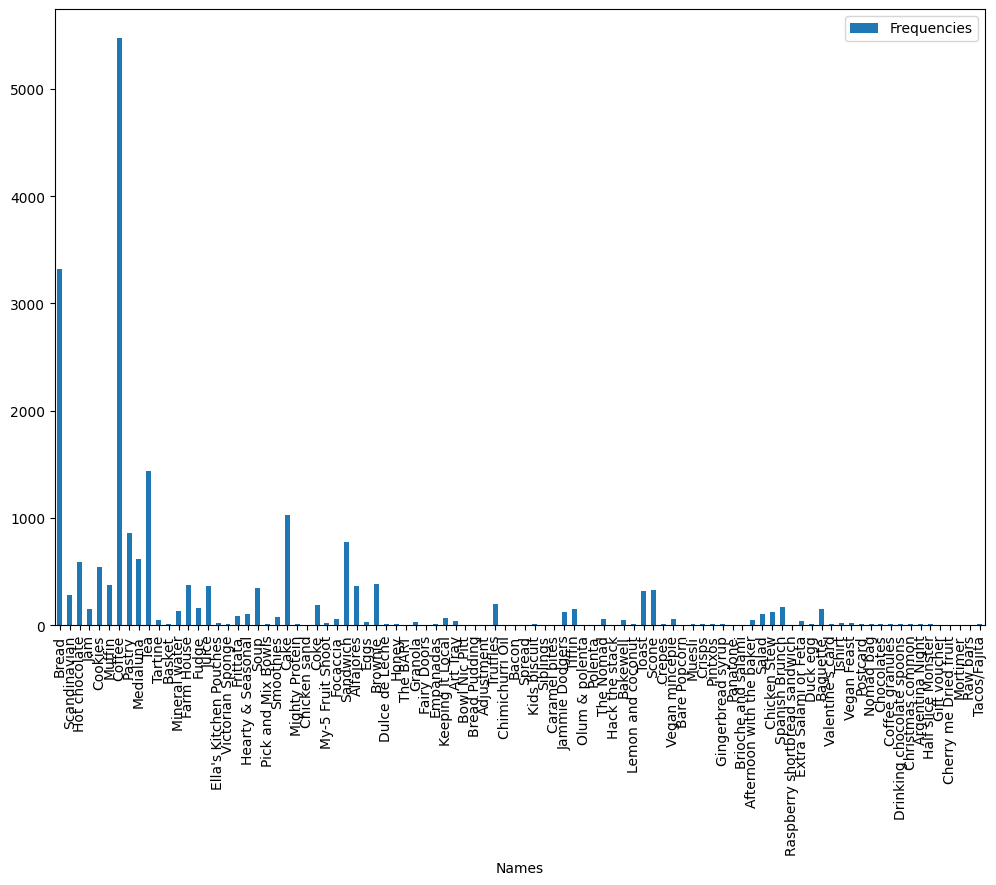

In [11]:
items_table.plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

<Axes: xlabel='Names'>

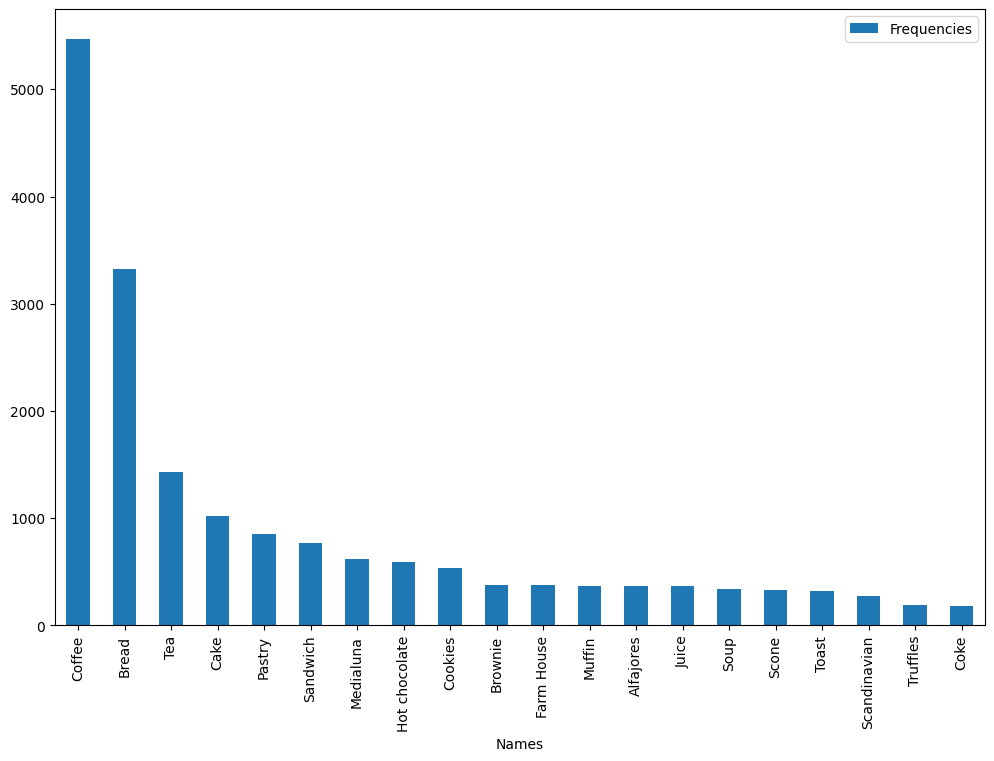

In [12]:
items_table.sort_values('Frequencies', ascending=False).head(20).\
    plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

In [13]:
bread_basket_data['Transaction'].describe()

count    20507.000000
mean      4976.202370
std       2796.203001
min          1.000000
25%       2552.000000
50%       5137.000000
75%       7357.000000
max       9684.000000
Name: Transaction, dtype: float64

In [14]:
bread_basket_data = bread_basket_data.groupby('Transaction').agg(','.join).reset_index()
bread_basket_data = bread_basket_data.drop(['Date', 'Time'], axis=1)
bread_basket_data.head(10)

,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
5,6,"Medialuna,Pastry,Muffin"
6,7,"Medialuna,Pastry,Coffee,Tea"
7,8,"Pastry,Bread"
8,9,"Bread,Muffin"
9,10,"Scandinavian,Medialuna"


In [15]:
bread_basket_data.head(10)

,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
5,6,"Medialuna,Pastry,Muffin"
6,7,"Medialuna,Pastry,Coffee,Tea"
7,8,"Pastry,Bread"
8,9,"Bread,Muffin"
9,10,"Scandinavian,Medialuna"


In [16]:
bread_basket_data.shape

(9465, 2)

In [17]:
items_data = bread_basket_data['Item']
items_data.head(10)

0                          Bread
1      Scandinavian,Scandinavian
2      Hot chocolate,Jam,Cookies
3                         Muffin
4            Coffee,Pastry,Bread
5        Medialuna,Pastry,Muffin
6    Medialuna,Pastry,Coffee,Tea
7                   Pastry,Bread
8                   Bread,Muffin
9         Scandinavian,Medialuna
Name: Item, dtype: object

In [18]:
items_list = [item.split(',') for item in items_data]

items_list_df = pd.DataFrame({'Items': items_list})

items_list_df.head(10)

,Items
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
5,"[Medialuna, Pastry, Muffin]"
6,"[Medialuna, Pastry, Coffee, Tea]"
7,"[Pastry, Bread]"
8,"[Bread, Muffin]"
9,"[Scandinavian, Medialuna]"


In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

transencoder = TransactionEncoder()

transencoder_array = transencoder.fit(items_list).transform(items_list)

In [20]:
encoded_df = pd.DataFrame(transencoder_array, columns=transencoder.columns_)

encoded_df.head(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
item_support_df = apriori(encoded_df, min_support=0.01, use_colnames=True)

item_support_df.shape

(61, 2)

In [22]:
item_support_df.sample(10)

,support,itemsets
37,0.016904,"(Bread, Medialuna)"
39,0.017010,"(Bread, Sandwich)"
24,0.034443,(Soup)
26,0.142631,(Tea)
50,0.047544,"(Coffee, Pastry)"
20,0.010460,(Salad)
40,0.028104,"(Bread, Tea)"
35,0.014474,"(Bread, Cookies)"
25,0.018172,(Spanish Brunch)
14,0.013207,(Jammie Dodgers)


In [23]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(item_support_df, 
                          metric='confidence', min_threshold=0.1)

rules.shape

(44, 10)

In [24]:
rules.sample(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
11,(Tea),(Bread),0.142631,0.327205,0.028104,0.197037,0.602181,-0.018566,0.837890,-0.435198
7,(Hot chocolate),(Bread),0.058320,0.327205,0.013418,0.230072,0.703144,-0.005665,0.873841,-0.309550
20,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
40,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
37,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354
23,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,0.022579
12,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
16,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236


In [25]:
rules.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
22,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
19,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [26]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

rules.sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
4,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431,1
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161,1
35,"(Bread, Coffee)",(Cake),0.090016,0.103856,0.010037,0.111502,1.073621,0.000688,1.008606,0.075356,2
12,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259,1
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947,1


In [30]:
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
42,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401,2
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553,1
16,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236,1
17,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556,1
18,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538,1
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006,1
40,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907,1
37,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354,2
33,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134,0.334566,1
32,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,0.309050,1


In [31]:
rules.sort_values('support', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
4,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431,1
5,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210,1
14,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684,1
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840,1
30,(Coffee),(Tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.413856,1
29,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.300482,1
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161,1
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205,1
22,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091,1
20,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403,1


In [27]:
rules[rules['antecedents'] == {'Juice'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.11675,0.002154,1.119919,0.108738,1


In [28]:
rules[rules['antecedents'] == {'Cake'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947,1
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840,1
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553,1
18,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538,1


In [29]:
rules[rules['antecedents'] == {'Sandwich'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
10,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503,-0.291561,1
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205,1
32,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,0.309050,1
